# Customer Data Pre-processing 

## Tasks

### Data Processing (70%)

Using standard python (No pandas / seaborn) with default libraries (os, sys, time, json, csv, …) you have been given the following tasks:

#### Solution to question 1.
Read in the provided ACW Data using the CSV library. 

In [3]:
# import csv library
# we import the csv module
import csv

In [4]:
import csv

try:
    with open("acw_user_data.csv", mode='r') as file:
        csv_reader = csv.reader(file, delimiter=',')

        # skip the header row
        #next(csv_reader)

        for line in csv_reader:
            print(line)

except FileNotFoundError:
    print("Error: File not found.")


['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']
['70 Lydia isle', 'Lake Conor', 'S71 7XZ', '89', '0', 'N/A', '08/18', '11/27', '676373692463', '875', '3', 'Kieran', 'GB62PQKB71416034141571', 'Wilson', 'married or civil partner', '7257', 'True', '72838', 'Male', 'Hyundai', 'Bonneville', '2009', 'Pickup']
['00 Wheeler wells', 'Chapmanton', 'L2 7BT', '46', '13.72', 'Begum-Williams', '08/12', '11/26', '4529436854129855', '583', '1', 'Jonathan', 'GB37UMCO54540228728019', 'Thomas', 'married or civil partner', '0', 'False', '54016', 'Male', 'Nissan', 'ATS', '1996', 'Coupe']
['Studio 33K Joel walk', 'Randallborough', 'ME3N 1G

#### Solution to question 2. 
As a CSV file is an entirely flat file structure, we need to convert our data back into its
rich structure. Convert all flat structures into nested structures. These are notably:
a. Vehicle - consists of make, model, year, and type
b. Credit Card - consists of start date, end date, number, security code, and
IBAN.
c. Address - consists of the main address, city, and postcode.
For this task, it may be worthwhile inspecting the CSV headers to see which data
columns may correspond to these above.
Note: Ensure that the values read in are appropriately cast to their respective types.  

In the code below......

In [5]:
# Let's try to extract the headers to inspect from the csv file
# Let's open the CSV file in order to read the content 
# file name (fn) is acw_user_data.csv
with open("acw_user_data.csv", mode = 'r') as fn:
    
    # Create a csv reader object
    csv_reader = csv.reader(fn, delimiter = ",") 
    # delimiter is the commas seperating the file
    
    # iterate through the headers of the file
    for line_no, line in enumerate(csv_reader): # Enumerate because we are interested in the position
        if line_no == 0:
            print(line)
  

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']


[DictReader](https://docs.python.org/3/library/csv.html#csv.DictReader)

In [6]:
# referencing [DictReader](https://docs.python.org/3/library/csv.html#csv.DictReader)

The DictReader will allow us read the information as a Dictionary instead of list. 
The columns will be keys and the rows as values

In [7]:
# we write a function that receives the data path and returns the reader
# object will be in dict form

path = "acw_user_data.csv"

def get_data(path): #define a function to read from the path
    
    #open the file for reading
    fn = open(path, "r")
    reader = csv.DictReader(fn)
    return reader

In [8]:
# call the above function to view objects in dict form

reader = get_data("acw_user_data.csv")

# iterate through the rows
for row in reader:
    print(row)

{'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ', 'Age (Years)': '89', 'Distance Commuted to Work (miles)': '0', 'Employer Company': 'N/A', 'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': '676373692463', 'Credit Card CVV': '875', 'Dependants': '3', 'First Name': 'Kieran', 'Bank IBAN': 'GB62PQKB71416034141571', 'Last Name': 'Wilson', 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': '7257', 'Retired': 'True', 'Yearly Salary (GBP)': '72838', 'Sex': 'Male', 'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': '2009', 'Vehicle Type': 'Pickup'}
{'Address Street': '00 Wheeler wells', 'Address City': 'Chapmanton', 'Address Postcode': 'L2 7BT', 'Age (Years)': '46', 'Distance Commuted to Work (miles)': '13.72', 'Employer Company': 'Begum-Williams', 'Credit Card Start Date': '08/12', 'Credit Card Expiry Date': '11/26', 'Credit Card Number': '4529436854129855', 'Cre

We can see that file is presented in a Dictionary form, the columns represent keys while the rows or features become values

- Convert the columns below into a nested structure.
- Vehicle -  consists of make, model, year, and type
- Credit Card - consists of start date, end date, number, security code, and IBAN.
- Address - consists of the main address, city, and postcode.

In [9]:
def get_row_data(row): # define a function to run information about a person
    data = {}  # where to store all data
#     V = {}  # where to store vehicle info
#     C = {}  # where to store credit card info
#     A = {}  # where to store address info
    V_list = {}  # list of all vehicles info
    C_list = {}       # list of all credit cards info
    A_list = {}       # list of all addresses info
    
    data["FName"] = row["First Name"] # assign FName as First Name
    data["LName"] = row["Last Name"] # assign LName as Last Name
    data["Sex"] = row["Sex"]
    data["Age"] = int(row['Age (Years)']) #age in integers
    data["Marital_Status"] = row["Marital Status"]
    data["Dependants"] = row["Dependants"]
    data["Employer"] = row['Employer Company']
    data["distance_to_work"] = float(row['Distance Commuted to Work (miles)']) # distance in float
    data["Salary"] = float(row['Yearly Salary (GBP)']) # yearly salary in float
    data["Pension"] = float(row['Yearly Pension (GBP)'])
    data["Retired"] = row["Retired"].lower().capitalize() == "True" # retired in bool
    
    A_list["Street"] = row["Address Street"]
    A_list["City"] = row["Address City"]
    A_list["Postcode"] = row["Address Postcode"]
    data["Address"] = A_list
    
    C_list["Start_date"] = row['Credit Card Start Date']
    C_list["Expiry_date"] = row['Credit Card Expiry Date']
    C_list["Number"] = float(row['Credit Card Number'])
    C_list["CVV"] = int(row['Credit Card CVV'])
    C_list["IBAN"] = row["Bank IBAN"]
    data["Credit_Card"] = C_list
    
    V_list["Make"] = row["Vehicle Make"]
    V_list["Model"] = row["Vehicle Model"]
    V_list["Year"] = row["Vehicle Year"]
    V_list["Type"] = row["Vehicle Type"]
    data["Vehicle"]= V_list # add Vehicle to Vehicle data
    
    return data

In [10]:
reader = get_data("acw_user_data.csv") # Apply the function above to read the contents of the Dictreader

result= [] # Save result in a list
    
for row in reader: # process each row to get each customer data
    data = get_row_data(row) # process each row of the data
    result.append(data) # we add each customer data in the form of dictionary

In [11]:
result

[{'FName': 'Kieran',
  'LName': 'Wilson',
  'Sex': 'Male',
  'Age': 89,
  'Marital_Status': 'married or civil partner',
  'Dependants': '3',
  'Employer': 'N/A',
  'distance_to_work': 0.0,
  'Salary': 72838.0,
  'Pension': 7257.0,
  'Retired': True,
  'Address': {'Street': '70 Lydia isle',
   'City': 'Lake Conor',
   'Postcode': 'S71 7XZ'},
  'Credit_Card': {'Start_date': '08/18',
   'Expiry_date': '11/27',
   'Number': 676373692463.0,
   'CVV': 875,
   'IBAN': 'GB62PQKB71416034141571'},
  'Vehicle': {'Make': 'Hyundai',
   'Model': 'Bonneville',
   'Year': '2009',
   'Type': 'Pickup'}},
 {'FName': 'Jonathan',
  'LName': 'Thomas',
  'Sex': 'Male',
  'Age': 46,
  'Marital_Status': 'married or civil partner',
  'Dependants': '1',
  'Employer': 'Begum-Williams',
  'distance_to_work': 13.72,
  'Salary': 54016.0,
  'Pension': 0.0,
  'Retired': False,
  'Address': {'Street': '00 Wheeler wells',
   'City': 'Chapmanton',
   'Postcode': 'L2 7BT'},
  'Credit_Card': {'Start_date': '08/12',
   'Exp

#### Solution to question 3
The client informs you that they have had difficulty with errors in the dependants
column. Some entries are empty (i.e. “ “ or “”), which may hinder your conversion
from Task 2. These should be changed into something meaningful when
encountered.
Print a list where all such error corrections take place.
E.g. Problematic rows for dependants: [16, 58, 80, 98]

In [10]:
empt_dep_rows = []

with open('acw_user_data.csv', mode = 'r') as fn:
    csv_reader = csv.reader(fn, delimiter = ',')

# iterate through the rows    
    for line, row in  enumerate (csv_reader):# enumerate to find the positions of the missing values
        if row[10]== " " or row[10]== "":
            empt_dep_rows.append(line) #add the positions of rows with missing values
                       
# Print the list of problematic rows       
            
            
print("Problematic rows for dependants: ", empt_dep_rows)

Problematic rows for dependants:  [22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


In [11]:
# 3b) replacing errors at dependants with "6" to make data meaningful

with open("acw_user_data.csv", "r") as fn:
   # we assign a variable name
    csv_reader = csv.reader(fn, delimiter = ",") # delimiter is the commas seperating the file

    # Find the rows with empty dependants column and replace empty values with 6   
    for line in csv_reader:
        if line[10]in [""," "]:
            line[10]= 6 # set to meaningful value
            print(line)

['9 Hargreaves loaf', 'New Keith', 'OX85 1NN', '40', '11.98', 'Frost-Howard', '09/18', '02/23', '3577676608962779', '426', 6, 'Sian', 'GB24RDII19341179851384', 'Marshall', 'married or civil partner', '0', 'False', '44434', 'Female', 'MAZDA', 'Tundra Regular Cab', '2001', 'Sedan']
['00 Jacqueline glen', 'Murrayland', 'M6 3RT', '32', '16.19', 'Rees and Sons', '03/16', '01/18', '180047286924058', '626', 6, 'Frances', 'GB50KMBN63722564631537', 'Chapman', 'married or civil partner', '0', 'False', '69158', 'Female', 'Lexus', 'Sienna', '2001', 'Convertible']
['794 Marcus junctions', 'North Carolyn', 'DA2 8QQ', '47', '12.42', 'Shepherd-Simpson', '12/14', '01/29', '213190467892834', '488', 6, 'Mandy', 'GB05NIVO06368406819123', 'Taylor', 'married or civil partner', '0', 'False', '46737', 'Female', 'Land Rover', 'Tundra Regular Cab', '1993', 'SUV']
['Flat 23w Teresa prairie', 'Paulinemouth', 'G0 4PL', '34', '13.91', 'Gibson Group', '05/17', '12/24', '4100618436815928712', '275', 6, 'Mitchell', 'G

#### Question 4
Write all records to a processed.json file in the JSON data format. This should be a
list of dictionaries, where each index of the list is a dictionary representing a singular
person.

In [12]:
# import the json modules

import json

In [13]:
def save_json(fp, data):
    with open(fp, "w") as fp:
        json.dump(data, fp, indent = 2)

In [14]:
# save the resulting list of dictionaries to a JSON file (processed.json file)

# fn = file name alias

with open("processed.json", mode = "w") as fn:# we write the processed.json file
    json.dump(result, fn, indent = 2) # we introduce indentation so all the data is not seen on a single line, it give us the json format in the processed. json file
#dump is used to save file and at a particular location

#### Question 5
You should create two additional file outputs, retired.json and employed.json, these should contain all retired customers (as indicated by the retired field in the CSV), and all employed customers respectively (as indicated by the employer field in the CSV) and be in the JSON data format.

In [15]:
retired = [] # create a list for retired
employed = []# create a list for employed

def get_status(result):
   
    
       
    for row in result:
        if row["Retired"]== True:
            retired.append(row)
        else:
            employed.append(row)
    return retired,employed

get_status(result)    
print(len(retired) ) 
len(employed)

246


754

In [16]:
# save the retired data as json

with open("retired.json", mode = "w") as ret:
    json.dump(retired, ret, indent = 2)

In [17]:
# save the employed data as json

with open("employed.json", mode = "w") as emp:
    json.dump(employed, emp, indent = 2)

In [18]:
# call the above saved files to view objects in dict form
retired, employed = get_status(result)

In [19]:
retired

[{'FName': 'Kieran',
  'LName': 'Wilson',
  'Sex': 'Male',
  'Age': 89,
  'Marital_Status': 'married or civil partner',
  'Dependants': '3',
  'Employer': 'N/A',
  'distance_to_work': 0.0,
  'Salary': 72838.0,
  'Pension': 7257.0,
  'Retired': True,
  'Address': {'Street': '70 Lydia isle',
   'City': 'Lake Conor',
   'Postcode': 'S71 7XZ'},
  'Credit_Card': {'Start_date': '08/18',
   'Expiry_date': '11/27',
   'Number': 676373692463.0,
   'CVV': 875,
   'IBAN': 'GB62PQKB71416034141571'},
  'Vehicle': {'Make': 'Hyundai', 'Model': 'Bonneville', 'Year': '2009'}},
 {'FName': 'Clive',
  'LName': 'Evans',
  'Sex': 'Male',
  'Age': 67,
  'Marital_Status': 'single',
  'Dependants': '1',
  'Employer': 'N/A',
  'distance_to_work': 0.0,
  'Salary': 27964.0,
  'Pension': 28075.0,
  'Retired': True,
  'Address': {'Street': '81 Goodwin dam',
   'City': 'Griffinstad',
   'Postcode': 'G3 7ZX'},
  'Credit_Card': {'Start_date': '07/15',
   'Expiry_date': '04/27',
   'Number': 213199489183130.0,
   'CVV'

In [20]:
employed

[{'FName': 'Jonathan',
  'LName': 'Thomas',
  'Sex': 'Male',
  'Age': 46,
  'Marital_Status': 'married or civil partner',
  'Dependants': '1',
  'Employer': 'Begum-Williams',
  'distance_to_work': 13.72,
  'Salary': 54016.0,
  'Pension': 0.0,
  'Retired': False,
  'Address': {'Street': '00 Wheeler wells',
   'City': 'Chapmanton',
   'Postcode': 'L2 7BT'},
  'Credit_Card': {'Start_date': '08/12',
   'Expiry_date': '11/26',
   'Number': 4529436854129855.0,
   'CVV': 583,
   'IBAN': 'GB37UMCO54540228728019'},
  'Vehicle': {'Make': 'Nissan', 'Model': 'ATS', 'Year': '1996'}},
 {'FName': 'Antony',
  'LName': 'Jones',
  'Sex': 'Male',
  'Age': 22,
  'Marital_Status': 'married or civil partner',
  'Dependants': '1',
  'Employer': 'Hill-Wright',
  'distance_to_work': 16.02,
  'Salary': 68049.0,
  'Pension': 0.0,
  'Retired': False,
  'Address': {'Street': 'Studio 33K Joel walk',
   'City': 'Randallborough',
   'Postcode': 'ME3N 1GH'},
  'Credit_Card': {'Start_date': '11/19',
   'Expiry_date': '

#### Question 6
The client states that there may be some issues with credit card entries. Any
customers that have more than 10 years between their start and end date need
writing to a separate file, called __remove_ccard.json__, in the JSON data format. The
client will manually deal with these later based on your output. They request that you
write a function to help perform this, which accepts a single row from the CSV data, and outputs whether the row should be flagged. This can then be used when
determining whether to write the current person to the __remove_ccard__ file. 

In [21]:
# C["Start_date"] = row['Credit Card Start Date']
#     C["Expiry_date"] = row['Credit Card Expiry Date']
#     C["Number"] = float(row['Credit Card Number'])
#     C["CVV"] = int(row['Credit Card CVV'])
#     C["IBAN"] = row["Bank IBAN"]
#     C_list.append(C) # add Credit Card to Credit Card list
#     data["Credit_Card"] = C_list

In [22]:
from datetime import datetime
import json

def credit_card_problem(line):
    start_date = datetime.strptime(line["Credit_Card"]["Start_date"], '%m/%y')
    expiry_date = datetime.strptime(line["Credit_Card"]["Expiry_date"], '%m/%y')
    diff_years = (expiry_date - start_date).days / 365.25
    return diff_years > 10

credit_card_issues = [line for line in result if credit_card_problem(line)]
with open("remove_ccard.json", "w") as remove_file:
    json.dump(credit_card_issues, remove_file)

In [23]:
credit_card_issues[2]

{'FName': 'Clive',
 'LName': 'Evans',
 'Sex': 'Male',
 'Age': 67,
 'Marital_Status': 'single',
 'Dependants': '1',
 'Employer': 'N/A',
 'distance_to_work': 0.0,
 'Salary': 27964.0,
 'Pension': 28075.0,
 'Retired': True,
 'Address': {'Street': '81 Goodwin dam',
  'City': 'Griffinstad',
  'Postcode': 'G3 7ZX'},
 'Credit_Card': {'Start_date': '07/15',
  'Expiry_date': '04/27',
  'Number': 213199489183130.0,
  'CVV': 389,
  'IBAN': 'GB04VSAZ69128049616822'},
 'Vehicle': {'Make': 'Volvo',
  'Model': 'Express 3500 Passenger',
  'Year': '2013'}}

In [24]:
#regular expression
#import re

we shall import regular expression which is used for Text data and used to find patterns in data 


In [25]:
# # we will loop through the original data
# reader = get_data("acw_user_data.csv") # 

# for row in reader:
#     st_dt = row["Credit Card Start Date"]
#     st_no = re.findall(r'[0-9]+',st_dt)  
#     print(st_no)

In [26]:
# # define function 

# def give_flag(row):
#     flag = True # for now we have no reason to believe the start and end date of the card will be less than 10 years
#     start_date = row["Credit Card Start Date"] # start date from original data
#     start_no = re.findall(r' [0-9]+' , start_date) # find all strings from zero to nine, (+) could be more than one value in start_date
#     start_no = int(start_no[(0)]) # 0 is a list
    
#     end_date = row["Credit Card Start Date"]
#     end_no = re.findall(r' [0-9]+' , end_date)
#     end_no = int(start_no[(0)])
#     diff = end_no - start_no
#     if diff < 10:
#         flag = False
#     return flag

In [27]:
# reader = get_data("acw_user_data.csv")

# flag_result = []

# for row in reader:
#     flag = give_flag(row) # call give_flag
    
#     if flag == True: # those who have start and end date to be true
#         row["flag"]= flag 
#         flag_result.append(row)

In [28]:
# from datetime import datetime
# import json

# def credit_card_problem(line):
#     start_date = datetime.strptime(line["Credit Card"]["Start date"], %m%y)
#     expiry_date = datetime.strptime(line["Credit Card"]["expiry date"], %m%y)
#     diff_years = (expiry_date - start_date).days / 365.25
#     return diff_year > 10

# credit_card_issues = [line for line on users if credit_card_problem(line)]
# with open("remove_ccard.json", "w") as remove_file:
#     json.dump(credit_card_issues, remove_file)

#### Question 7
You have been tasked with calculating some additional metrics which will be used for
ranking customers. You should create a new data attribute for our customers called
“Salary-Commute”. Reading in from __processed.json__:
a. Add, and calculate appropriately, this new attribute. It should represent the
Salary that a customer earns, per mile of their commute.
i. Note: If a person travels 1 or fewer commute miles, then their salarycommute would be just their salary.
b. Sort these records by that new metric, in ascending order.
c. Store the output file out as a JSON format, for a __commute.json__ file.

In [73]:

with open('processed.json', 'r') as fn:
    result = json.load(fn)


for row in result:
    distance = float(row["distance_to_work"])
    salary = float(row["Salary"])
    if distance <= 1:
        row['Salary-Commute'] = salary
    else:
        row['Salary-Commute'] = salary / distance
        
    #row["Salary-Commute"] = salary_commute


result_sorted = sorted(result, key=lambda k: k['Salary-Commute'])

# Let's reconfirm
for person in result_sorted:
    print(f"Salary-Commute is {person['Salary-Commute']}")
# print(f"Salary-Commute for the first customer is {result_sorted [0]['Salary-Commute']}")
# print(f"Salary-Commute for the first customer is {result_sorted [999]['Salary-Commute']}")


Salary-Commute is 3088.04347826087
Salary-Commute is 3090.070921985816
Salary-Commute is 3090.5017921146955
Salary-Commute is 3090.9252669039147
Salary-Commute is 3094.0663176265266
Salary-Commute is 3094.316163410302
Salary-Commute is 3097.0790378006873
Salary-Commute is 3097.560975609756
Salary-Commute is 3097.9238754325256
Salary-Commute is 3098.9672977624787
Salary-Commute is 3099.1438356164385
Salary-Commute is 3100.1712328767126
Salary-Commute is 3101.2048192771085
Salary-Commute is 3105.387205387205
Salary-Commute is 3105.912162162162
Salary-Commute is 3106.2184873949577
Salary-Commute is 3109.0609555189453
Salary-Commute is 3109.8684210526317
Salary-Commute is 3114.169381107492
Salary-Commute is 3114.262560777958
Salary-Commute is 3116.8557536466774
Salary-Commute is 3117.961165048544
Salary-Commute is 3120.0320512820513
Salary-Commute is 3124.920634920635
Salary-Commute is 3128.031496062992
Salary-Commute is 3128.90625
Salary-Commute is 3130.0155520995336
Salary-Commute is 313

In [30]:
# Let's use a context manager to write our updated data in a json file named "commute.json"
with open("commute.json", "w") as cj:
    json.dump(result_sorted, cj, indent = 2)

In [ ]:
with open("commute.json", "r") as cj:
    data = json.load(cj)

In [31]:
data

[{'FName': 'Graeme',
  'LName': 'Jackson',
  'Sex': 'Male',
  'Age': 52,
  'Marital_Status': 'single',
  'Dependants': '2',
  'Employer': 'Smith, Birch and Burke',
  'distance_to_work': 5.52,
  'Salary': 17046.0,
  'Pension': 0.0,
  'Retired': False,
  'Address': {'Street': 'Studio 9 Reid lights',
   'City': 'South Ryan',
   'Postcode': 'E27 9GY'},
  'Credit_Card': {'Start_date': '06/14',
   'Expiry_date': '04/29',
   'Number': 4713424668774153.0,
   'CVV': 3053,
   'IBAN': 'GB09ELJH35362236053720'},
  'Vehicle': {'Make': 'Chevrolet',
   'Model': 'Rally Wagon 1500',
   'Year': '2011'},
  'Salary-Commute': 3088.04347826087},
 {'FName': 'Janet',
  'LName': 'Quinn',
  'Sex': 'Female',
  'Age': 30,
  'Marital_Status': 'married or civil partner',
  'Dependants': '1',
  'Employer': 'Wood-Davies',
  'distance_to_work': 5.64,
  'Salary': 17428.0,
  'Pension': 0.0,
  'Retired': False,
  'Address': {'Street': 'Studio 34r Wilkinson camp',
   'City': 'Louisland',
   'Postcode': 'G7H 8FA'},
  'Cred

### Data Visualisation (20%) 

Using Pandas and Seaborn 

Your client wishes to understand the data they have on their customers a bit more by use of
visualisations. With use of Pandas and Seaborn read in the original CSV file provided with
the assignment. 

#### Question 1
Obtain the Data Series for Salary, and Age, and calculate the following:

a. Mean Salary

b. Median Age

In [32]:
# import the libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
#load the data set ie acw_user_data.csv
df = pd.read_csv('acw_user_data.csv')
df

Address Street    Address City Address Postcode  Age (Years)  \
0                70 Lydia isle      Lake Conor          S71 7XZ           89   
1             00 Wheeler wells      Chapmanton           L2 7BT           46   
2         Studio 33K Joel walk  Randallborough         ME3N 1GH           22   
3    Studio 46S Bethany lights      East Reece          E10 9RJ           56   
4       Flat 3 Christine views    Fletcherstad          WS2 9SN           57   
..                         ...             ...              ...          ...   
995   Studio 6 Heather prairie    North Amelia           E9 0HB           48   
996          Flat 3 Davies run      Greenshire           E7 4UJ           22   
997     Flat 7 Barber motorway    Burrowsshire          L62 8TA           38   
998              00 Tony forks       Abbiebury          NP4 1JL           45   
999       Flat 9 Mohamed route       West Glen         LL3M 4WS           80   

     Distance Commuted to Work (miles)          Employer Company  \
0                                 0.00                       NaN   
1                                13.72            Begum-Williams   
2                                16.02               Hill-Wright   
3                                19.35                 Green LLC   
4                                 5.94  Hill, Evans and Harrison   
..                                 ...                       ...   
995                              18.44             Phillips-Pope   
996                              19.61                Hughes LLC   
997                               6.66              Bailey Group   
998                              18.13              Foster-Price   
999                               0.00                       NaN   

    Credit Card Start Date Credit Card Expiry Date   Credit Card Number  \
0                    08/18                   11/27         676373692463   
1                    08/12                   11/26     4529436854129855   
2                    11/19                   07/27  4091726363083888495   
3                    10/17                   04/18  4671332769487632633   
4                    04/19                   11/27     2245094149128526   
..                     ...                     ...                  ...   
995                  04/19                   08/26     3563802099155576   
996                  05/12                   07/28     3591311819315276   
997                  01/13                   05/29     3584931475767707   
998                  04/19                   05/23     4090311300716168   
999                  12/14                   01/16      180020306382110   

     Credit Card CVV  ...  Last Name            Marital Status  \
0                875  ...     Wilson  married or civil partner   
1                583  ...     Thomas  married or civil partner   
2                422  ...      Jones  married or civil partner   
3                669  ...       Shaw  married or civil partner   
4                659  ...    O'Brien  married or civil partner   
..               ...  ...        ...                       ...   
995              908  ...      Clark  married or civil partner   
996              675  ...      Jones  married or civil partner   
997              679  ...     Walker                    single   
998              775  ...    Thomson  married or civil partner   
999              903  ...    Russell                    single   

    Yearly Pension (GBP) Retired Yearly Salary (GBP)     Sex  Vehicle Make  \
0                   7257    True               72838    Male       Hyundai   
1                      0   False               54016    Male        Nissan   
2                      0   False               68049    Male           GMC   
3                      0   False               91337    Male         Scion   
4                      0   False               18446  Female         Buick   
..                   ...     ...                 ...     ...           ...  

In [34]:
df.columns

Index(['Address Street', 'Address City', 'Address Postcode', 'Age (Years)',
       'Distance Commuted to Work (miles)', 'Employer Company',
       'Credit Card Start Date', 'Credit Card Expiry Date',
       'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name',
       'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)',
       'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make',
       'Vehicle Model', 'Vehicle Year', 'Vehicle Type'],
      dtype='object')

In [35]:
df.describe().transpose()

count          mean           std  \
Age (Years)                        1000.0  5.430200e+01  2.131965e+01   
Distance Commuted to Work (miles)  1000.0  1.045777e+01  6.951997e+00   
Credit Card Number                 1000.0  4.188020e+17  1.304208e+18   
Credit Card CVV                    1000.0  9.324820e+02  1.626125e+03   
Dependants                          981.0  2.135576e+00  9.777987e-01   
Yearly Pension (GBP)               1000.0  5.875413e+03  1.098651e+04   
Yearly Salary (GBP)                1000.0  5.781408e+04  2.327042e+04   
Vehicle Year                       1000.0  2.006927e+03  8.211035e+00   

                                            min           25%           50%  \
Age (Years)                        1.800000e+01  3.600000e+01  5.400000e+01   
Distance Commuted to Work (miles)  0.000000e+00  5.637500e+00  1.217000e+01   
Credit Card Number                 6.041600e+10  3.857314e+13  3.510666e+15   
Credit Card CVV                    2.000000e+00  2.770000e+02  5.595000e+02   
Dependants                         1.000000e+00  1.000000e+00  2.000000e+00   
Yearly Pension (GBP)               0.000000e+00  0.000000e+00  0.000000e+00   
Yearly Salary (GBP)                1.704600e+04  3.908975e+04  5.751800e+04   
Vehicle Year                       1.992000e+03  2.000000e+03  2.008000e+03   

                                            75%           max  
Age (Years)                        7.200000e+01  9.100000e+01  
Distance Commuted to Work (miles)  1.626250e+01  2.034000e+01  
Credit Card Number                 4.635909e+15  4.967327e+18  
Credit Card CVV                    8.332500e+02  9.977000e+03  
Dependants                         3.000000e+00  5.000000e+00  
Yearly Pension (GBP)               0.000000e+00  4.611700e+04  
Yearly Salary (GBP)                7.721150e+04  9.891500e+04  
Vehicle Year                       2.014000e+03  2.020000e+03

In [36]:
# extract the Salary and Age columns as separate series
# salary = df["Yearly Salary (GBP)"]
# age = df["'Age (Years)"]


In [37]:
## Obtain the Data Series for Salary
salary = df['Yearly Salary (GBP)'] 
salary

0      72838
1      54016
2      68049
3      91337
4      18446
       ...  
995    84645
996    93314
997    20940
998    82412
999    25788
Name: Yearly Salary (GBP), Length: 1000, dtype: int64

In [38]:
## Obtain the Data Series for Age
age = df['Age (Years)']
age

0      89
1      46
2      22
3      56
4      57
       ..
995    48
996    22
997    38
998    45
999    80
Name: Age (Years), Length: 1000, dtype: int64

In [39]:
# a) Calculate Mean Salary
mean_salary = salary.mean()
print(salary.mean())
print(f"Mean Yearly Salary (GBP): {salary.mean():.2f}")

57814.078
Mean Yearly Salary (GBP): 57814.08


In [40]:
# b) Calculate Median Age
median_age = age.median()
print(age.median())

print(f"Median Age (Years):", age.median())

54.0
Median Age (Years): 54.0


#### Question 2
Perform univariate plots of the following data attributes:

a. Age, calculating how many bins would be required for a bin_width of 5.

b. Dependents, fixing data errors with seaborn itself.

c. Age (of default bins), conditioned on Marital Status

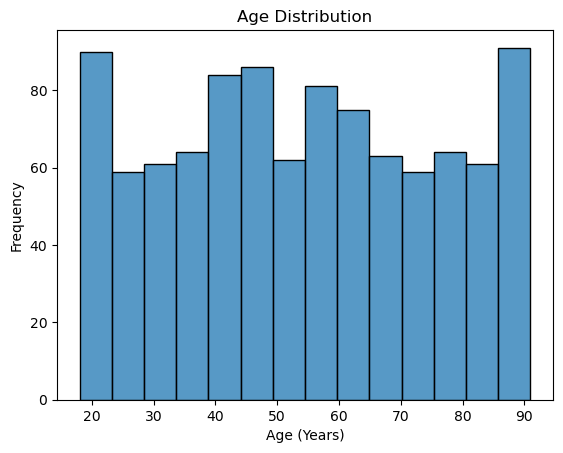

In [41]:
# a. Age, calculating how many bins would be required for a bin_width of 5.

# find maximum age
Max_age = df['Age (Years)'].max()
#print(Max_age)        

# find minimum age
Min_age = df['Age (Years)'].min()
#print(Min_age)

# calculate number of bins 
bin_width = 5
no_bins = int((Max_age - Min_age) // 5)

# we create age histogram
age_plt = sns.histplot(age, bins = no_bins)

# add labels and heading
# plt.hist(age, bins = no_bins)
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.title ('Age Distribution')

#plot the age histogram
plt.show()

In [42]:
# b. Dependents, fixing data errors with seaborn itself.

In [43]:
# to check categories we use unique

df['Dependants'].unique()

array([ 3.,  1.,  2.,  4., nan,  5.])

In [44]:
df["Dependants"].isnull().sum()

19

There are 19 missing values in the dependants column

In [45]:
# check for missing values

df['Dependants'].isnull().values.any()

True

In [46]:
# we drop the missing value since the number is quite insignificant to the data set size
df1 = df.dropna(subset = ["Dependants"], inplace = True)

In [47]:
#sanity check

df['Dependants'].isnull().values.any()

False

In [48]:
df["Dependants"].isnull().sum()

0

There are no values missing in the dependants column

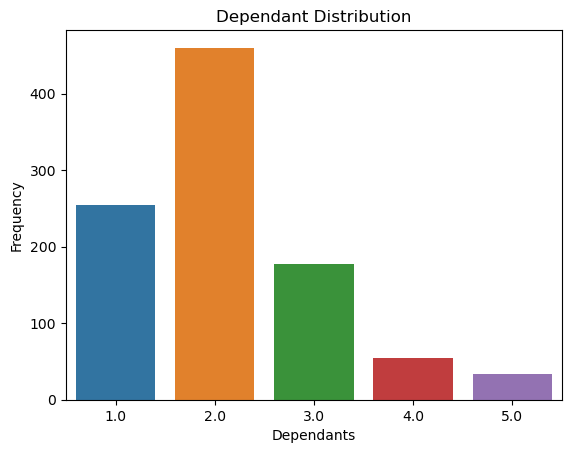

In [49]:
dependant_plt = sns.countplot(x='Dependants', data=df)

plt.xlabel('Dependants')
plt.ylabel('Frequency')
plt.title ('Dependant Distribution')

plt.show()


In [50]:
# c. Age (of default bins), conditioned on Marital Status

In [51]:
df['Marital Status'].unique()

array(['married or civil partner', 'single', 'widowed', 'divorced'],
      dtype=object)

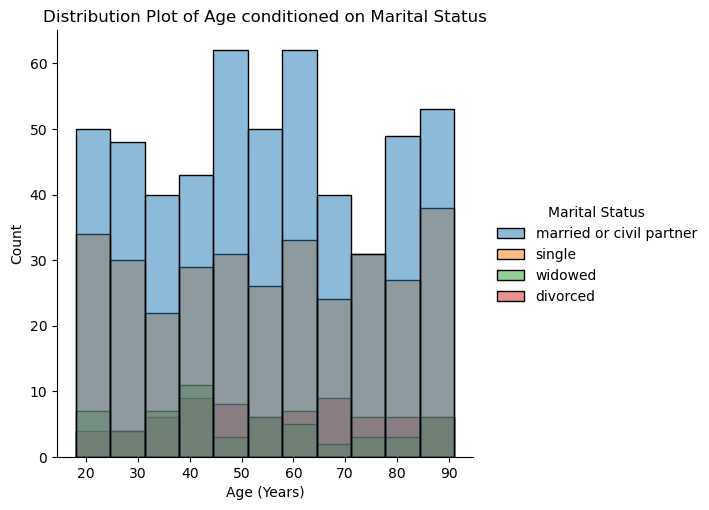

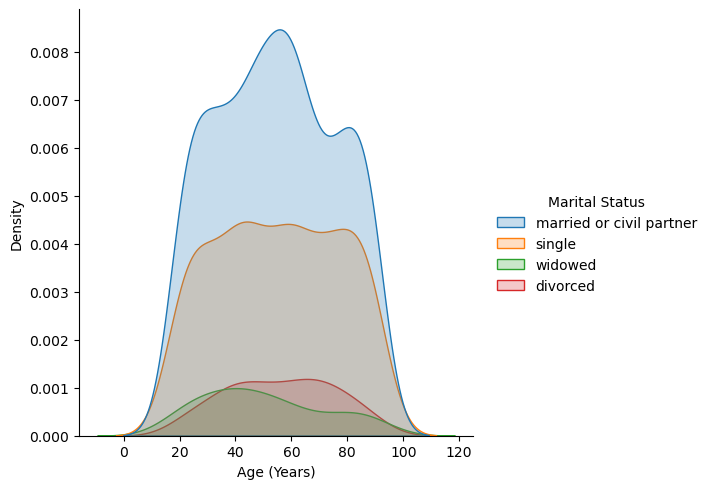

In [52]:
age_marital_plt= sns.displot(df, x ='Age (Years)', hue ='Marital Status')
plt.title ('Distribution Plot of Age conditioned on Marital Status')

plt.show()

# from the above displot output, it is seen that the plot failed to display all the hue categorical value due to their counts.

# let's include the kind value "kde" and fill the category for a better visualization.

age_marital1_plt= sns.displot(df, x ='Age (Years)', hue ='Marital Status', kind = "kde", fill = True)

# Now we have a clearer visualization display

#### Question 3
Perform multivariate plots with the following data attributes:
    
a. Commuted distance against salary.

b. Age against Salary

c. Age against Salary conditioned by Dependants

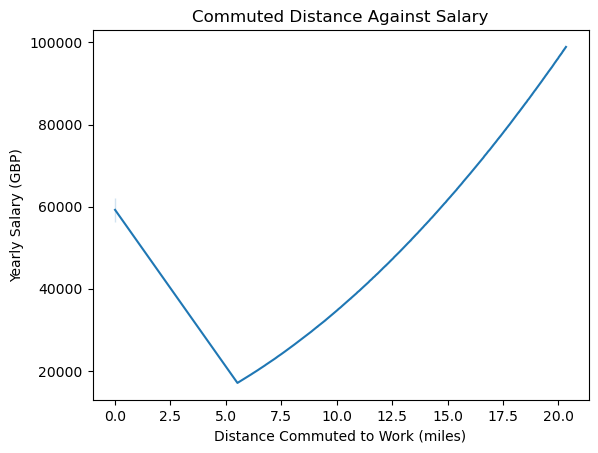

In [53]:
# a) Perform multivariate plots - Commuted distance against salary
# 'Distance Commuted to work (miles)' against 'Yearly Salary' with variable name commuted_distance_salary_plt  

commuted_distance_salary_plt = sns.lineplot(data = df, x = 'Distance Commuted to Work (miles)', y = 'Yearly Salary (GBP)')

plt.title ('Commuted Distance Against Salary')

plt.show()

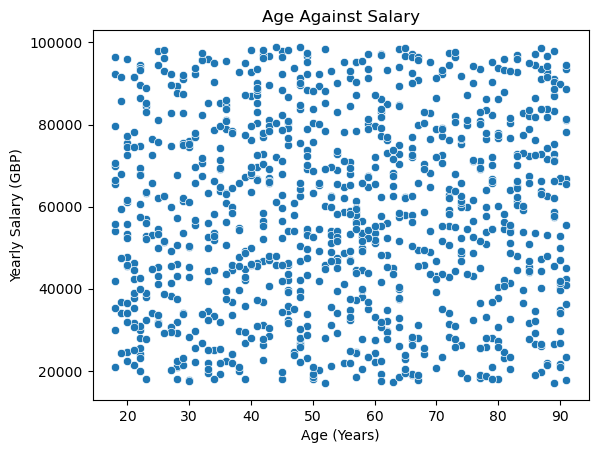

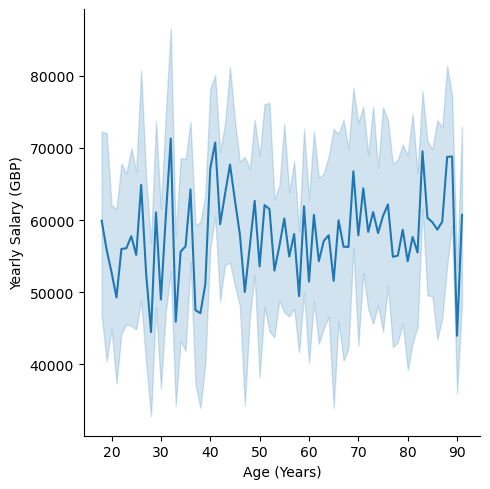

In [54]:
# b) Perform multivariate plot - Age against Salary

# 'Age' against 'Yearly Salary' with variable name age_salary_plt, age_salary_plt1 
age_salary_plt = sns.scatterplot(data = df, x = 'Age (Years)', y = 'Yearly Salary (GBP)')

plt.title ('Age Against Salary')

plt.show()

# This can better be represented using a 'line' relplot giving us a clean readable plot.
age_salary1_plt = sns.relplot(data = df, x = 'Age (Years)', y = 'Yearly Salary (GBP)', kind = 'line')


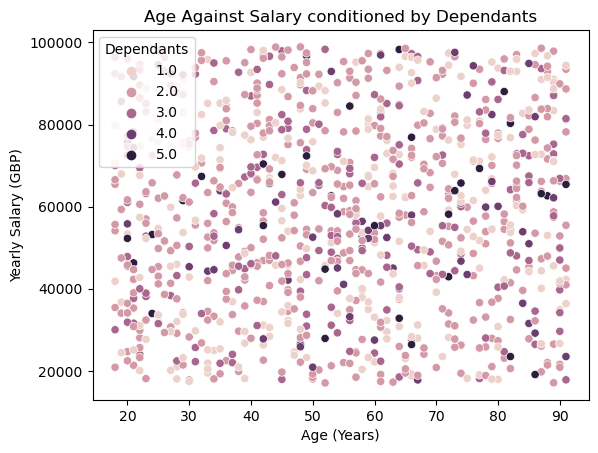

In [55]:
# c)  Perform multivariate plot- Age against Salary conditioned by Dependants

# 'Age' against 'Salary' conditioned by 'Dependants' with variable name age_salary_dependant_plt.

age_salary_dependant_plt = sns.scatterplot(data = df, x = 'Age (Years)', y = 'Yearly Salary (GBP)', hue = 'Dependants')

plt.title ('Age Against Salary conditioned by Dependants')

plt.show()

#### Question 4
Your client would like the ability to save the plots which you have produced. Provide
a Notebook cell which can do this.

In [56]:
# for axes- subplot, using a get_figure() before the savefig() is required

In [57]:
 age_plt.get_figure().savefig('./age.png') #Employee Ages

In [58]:
dependant_plt.get_figure().savefig('./dependant.png') # Count of Dependants

In [59]:
age_marital_plt.savefig('./age_marital.png') # Employee Ages with respect to their Marital Status

In [60]:
age_marital1_plt.savefig('./age_marital1.png')# Employee Ages with respect to their Marital Status presenting a clearer visualization using "kde"

In [61]:
commuted_distance_salary_plt.get_figure().savefig('./commuted_distance_salary.png') # Commuted Distance Against Salary

In [62]:
age_salary_plt.get_figure().savefig('./age_salary.png') # Age Against Salary

In [63]:
age_salary1_plt.savefig('./age_salary1.png')# Age Against Salary using 'line' relplot giving us a clean readable plot

In [64]:
age_salary_dependant_plt.get_figure().savefig('./age_salary_dependant.png') # Age Against Salary conditioned by Dependants

In [12]:
 age_plt.savefig('./age.png') #Employee Ages

NameError: name 'age_plt' is not defined

### 